## Read Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("fer2013.csv")
df_training = df[df['Usage']=='Training']
df_training

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


In [51]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [31]:
pixels = list(df["pixels"])
X = []
Y = []
for i in range(len(df_training)):
    pixel = [int(num) for num in df["pixels"][i].split()]
    emo = df["emotion"][i]
    X.append(pixel)
    Y.append(emo)
    ## reshape into 48*48*1 and rescale
X = np.array(X)
X = X.reshape(X.shape[0], 48, 48,1)
X = X.astype("float32")
X /= 255
Y = np.array(Y)

In [3]:
from keras.utils.np_utils import to_categorical
Y = to_categorical(Y)
np.shape(Y)

(28709, 7)

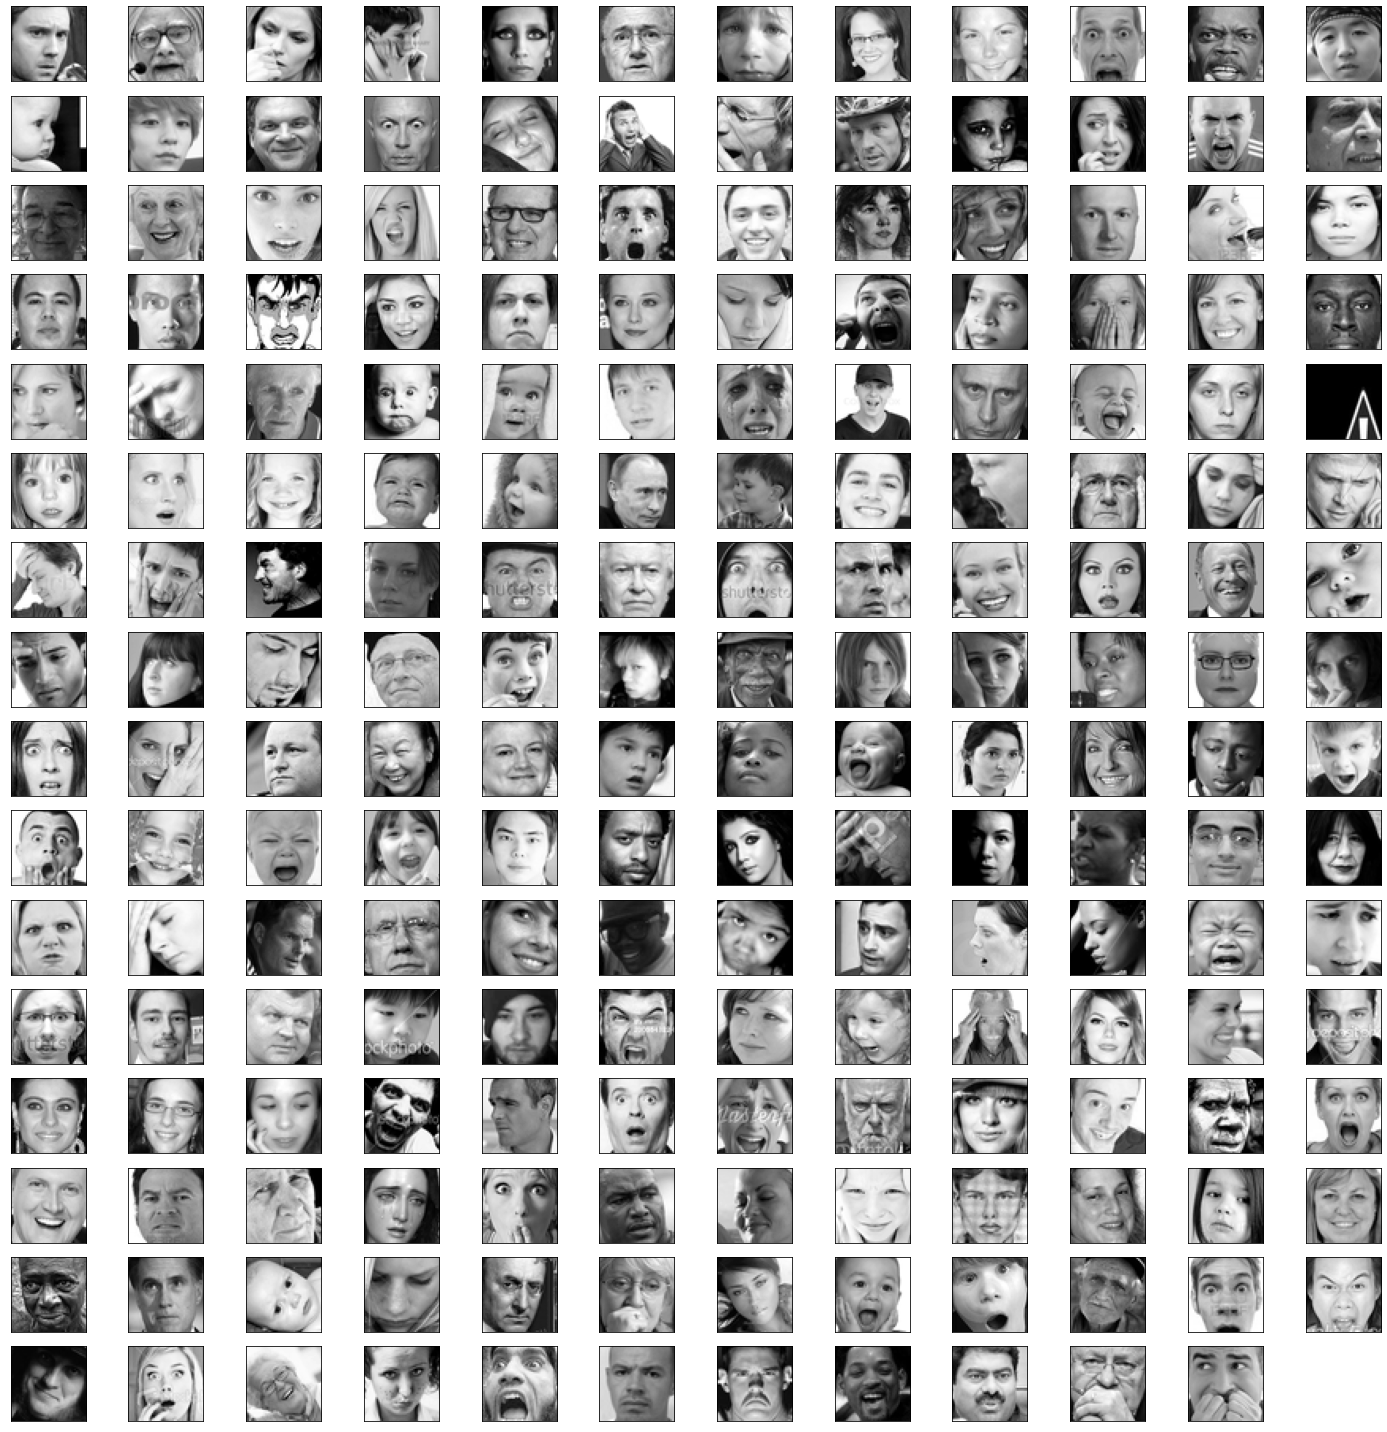

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
for i in range(0, 191):
    input_img = X[i:(i+1),:,:,:]
    ax = fig.add_subplot(16,12,i+1)
    ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

# Training

In [5]:
from keras import layers
from keras import models
from keras import optimizers

modelN = models.Sequential()
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 1)))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(7, activation='softmax'))

# optimizer:
modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')

modelF = modelN.fit(X, Y, epochs=32, batch_size=128, shuffle=True, verbose=1)


Training....
Epoch 1/32
225/225 [==============================] - 149s 660ms/step - loss: 1.8207 - accuracy: 0.2508
Epoch 2/32
225/225 [==============================] - 153s 679ms/step - loss: 1.8122 - accuracy: 0.2510
Epoch 3/32
225/225 [==============================] - 147s 653ms/step - loss: 1.8071 - accuracy: 0.2505
Epoch 4/32
225/225 [==============================] - 146s 648ms/step - loss: 1.7493 - accuracy: 0.2790
Epoch 5/32
225/225 [==============================] - 144s 641ms/step - loss: 1.5357 - accuracy: 0.3924
Epoch 6/32
225/225 [==============================] - 145s 644ms/step - loss: 1.3747 - accuracy: 0.4665
Epoch 7/32
225/225 [==============================] - 145s 646ms/step - loss: 1.2657 - accuracy: 0.5149
Epoch 8/32
225/225 [==============================] - 145s 646ms/step - loss: 1.1714 - accuracy: 0.5538
Epoch 9/32
225/225 [==============================] - 146s 648ms/step - loss: 1.0890 - accuracy: 0.5889
Epoch 10/32
225/225 [==============================

In [6]:
modelN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        3

# Test

In [7]:
df = pd.read_csv("fer2013.csv")
df_test = df[df['Usage']=='PublicTest']
df_test

,emotion,pixels,Usage
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest
...,...,...,...
32293,4,178 176 172 173 173 174 176 173 166 166 206 22...,PublicTest
32294,3,25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...,PublicTest
32295,4,255 255 255 255 255 255 255 255 255 255 255 25...,PublicTest
32296,4,33 25 31 36 36 42 69 103 132 163 175 183 187 1...,PublicTest


In [8]:
pixels = list(df_test["pixels"])
X_test = []
Y_test = []
for i in range(28709, len(df_test)+28709):
    pixel = [int(num) for num in df_test["pixels"][i].split()]
    emo = df_test["emotion"][i]
    X_test.append(pixel)
    Y_test.append(emo)
    ## reshape into 48*48*1 and rescale
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], 48, 48,1)
X_test = X_test.astype("float32")
X_test /= 255
Y_ori = np.array(Y_test)
Y_test = to_categorical(Y_ori)
np.shape(Y_test)

(3589, 7)

In [9]:
Y_pred = modelN.predict(X_test)
np.shape(Y_pred)

(3589, 7)

In [43]:
def backToEmo(y_pred):
    new_y_pred = []
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    num_ob = [0,1,2,3,4,5,6]
    for p in range (len(y_pred)):
        a=y_pred[p]
        m = a[0]
        ind = 0
        for i in range(0,len(a)):
            if a[i]>m:
                m=a[i]
                ind=i
        new_y_pred.append(objects[num_ob[ind]])
    return new_y_pred

In [11]:
new_y_pred = backToEmo(Y_pred)

In [12]:
from sklearn.metrics import accuracy_score
print("accuracy score: ", accuracy_score(Y_ori, new_y_pred))

accuracy score:  0.5399832822513235


In [13]:
modelN.evaluate(X_test,Y_test)

113/113 [==============================] - 4s 35ms/step - loss: 3.4325 - accuracy: 0.5400


[3.432474136352539, 0.5399832725524902]

In [41]:
Emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [33]:
import cv2
myimage = cv2.imread("mysmile.jpg", cv2.IMREAD_GRAYSCALE)
myimage = cv2.resize(myimage,(48,48),interpolation=cv2.INTER_CUBIC)
np.shape(myimage)
myimage = np.array(myimage)
myimage = myimage.astype("float32")
myimage /= 255
np.shape(myimage)

(48, 48)

['neutral']

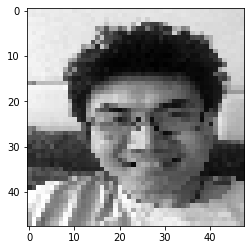

In [49]:
plt.imshow(myimage,cmap=plt.cm.gray)
pred = modelN.predict(np.reshape(myimage,(1,48,48,1)))
pred = backToEmo(pred)
pred

['angry']

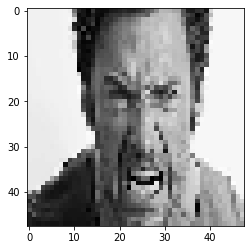

In [50]:
angryimage = cv2.imread("angry.jpg", cv2.IMREAD_GRAYSCALE)
angryimage = cv2.resize(angryimage,(48,48),interpolation=cv2.INTER_CUBIC)
angryimage = np.array(angryimage)
angryimage = angryimage.astype("float32")
angryimage /= 255
plt.imshow(angryimage, cmap=plt.cm.gray)
pred = modelN.predict(np.reshape(angryimage,(1,48,48,1)))
pred = backToEmo(pred)
pred